In [596]:
import pandas as pd
import matplotlib.pyplot as plt

#Reads in the csv file
df = pd.read_csv("16k_movies.csv")


#Look into the duration

In [597]:
#Takes out the columns listed below
removed_cols = ["No of Persons Voted","Description", "Written by", "Directed by"]
df.drop(removed_cols,inplace=True,axis=1)

#Drop rows with empty entries
df.dropna()

,Unnamed: 0,Title,Release Date,Rating,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",7.4,9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",8.3,1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970",7.3,1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",8.1,2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004",7.8,3 h 7 m,"Drama,History"
...,...,...,...,...,...,...
16277,16277,The Garbage Pail Kids Movie,"Aug 22, 1987",1.0,1 h 40 m,"Adventure,Comedy,Family,Fantasy,Musical"
16278,16278,Death of a Nation,"Aug 3, 2018",4.3,1 h 48 m,"Documentary,History"
16279,16279,United Passions,"Jun 5, 2015",0.8,1 h 50 m,"Drama,History,Sport"
16280,16280,Bio-Dome,"Jan 12, 1996",8.0,1 h 28 m,Comedy


The data source is a list of 16,000 movies that include their rating, genre, and duration. It also includes release dates. Here is a link to the data: https://www.kaggle.com/datasets/kashifsahil/16000-movies-1910-2024-metacritic?resource=download. My question is what movie genres are the most popular. Some sub questions are, how has this influenced the movies being made and does duration affect the rating of a movie.

In [598]:
#Calculates quartiles and gives the interquartile range
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Defines the cleaned database
df_cleaned = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]

In [599]:
#Drops any duplicate rows
df_cleaned.drop_duplicates()

,Unnamed: 0,Title,Release Date,Rating,Duration,Genres
0,0,Dekalog (1988),"Mar 22, 1996",7.4,9 h 32 m,Drama
1,1,Three Colors: Red,"Nov 23, 1994",8.3,1 h 39 m,"Drama,Mystery,Romance"
2,2,The Conformist,"Oct 22, 1970",7.3,1 h 47 m,Drama
3,3,Tokyo Story,"Mar 13, 1972",8.1,2 h 16 m,Drama
4,4,The Leopard (re-release),"Aug 13, 2004",7.8,3 h 7 m,"Drama,History"
...,...,...,...,...,...,...
16271,16271,National Lampoon's Gold Diggers,"Sep 17, 2004",3.1,1 h 30 m,"Comedy,Crime"
16275,16275,Hillary's America: The Secret History of the D...,"Jul 15, 2016",4.8,1 h 46 m,"Documentary,Biography,History"
16278,16278,Death of a Nation,"Aug 3, 2018",4.3,1 h 48 m,"Documentary,History"
16280,16280,Bio-Dome,"Jan 12, 1996",8.0,1 h 28 m,Comedy


In [600]:
# Split the genres and explode the dataframe
df_genres_seperated = df_cleaned.assign(Genres=df_cleaned['Genres'].str.split(',')).explode('Genres')

# Get the count of movies in each genre
genre_counts = df_genres_seperated['Genres'].value_counts()

# Keep only genres with 50 or more movies
valid_genres = genre_counts[genre_counts >= 50].index

# Filter the original dataframe to include only rows with valid genres
df_genres_seperated = df_genres_seperated[df_genres_seperated['Genres'].isin(valid_genres)]


# Create a pivot table with the exploded 'Genres' column
ratings_pivot = pd.pivot_table(df_genres_seperated, 
                               index='Genres', 
                               values='Rating', 
                               aggfunc='mean')

# Round the average ratings for readability
average_ratings = ratings_pivot['Rating'].round(2)

# Print the pivot table
print(average_ratings)

Genres
Action         6.65
Adventure      6.66
Animation      6.94
Biography      6.89
Comedy         6.64
Crime          6.85
Documentary    6.77
Drama          6.81
Family         6.67
Fantasy        6.68
History        6.88
Horror         6.33
Music          6.84
Musical        6.87
Mystery        6.61
Romance        6.71
Sci-Fi         6.56
Sport          6.84
Thriller       6.65
War            6.90
Western        6.71
Name: Rating, dtype: float64


In [601]:
#This block deals with statistics of the data

# Finds the highest/lowest rated genre
max_rating = average_ratings.max()
min_rating = average_ratings.min()

# Get the genres corresponding to the max and min ratings
highest_rated_genre = average_ratings.idxmax()
lowest_rated_genre = average_ratings.idxmin()

# Creates a table of average ratings
ratings_table = pd.DataFrame({
    'Genre': average_ratings.index,  
    'Average Rating': average_ratings.values  
})

# Finds the highest/lowest rated genre
max_rating = average_ratings.max()
min_rating = average_ratings.min()

# Get the genres corresponding to the max and min ratings
highest_rated_genre = average_ratings.idxmax()
lowest_rated_genre = average_ratings.idxmin()


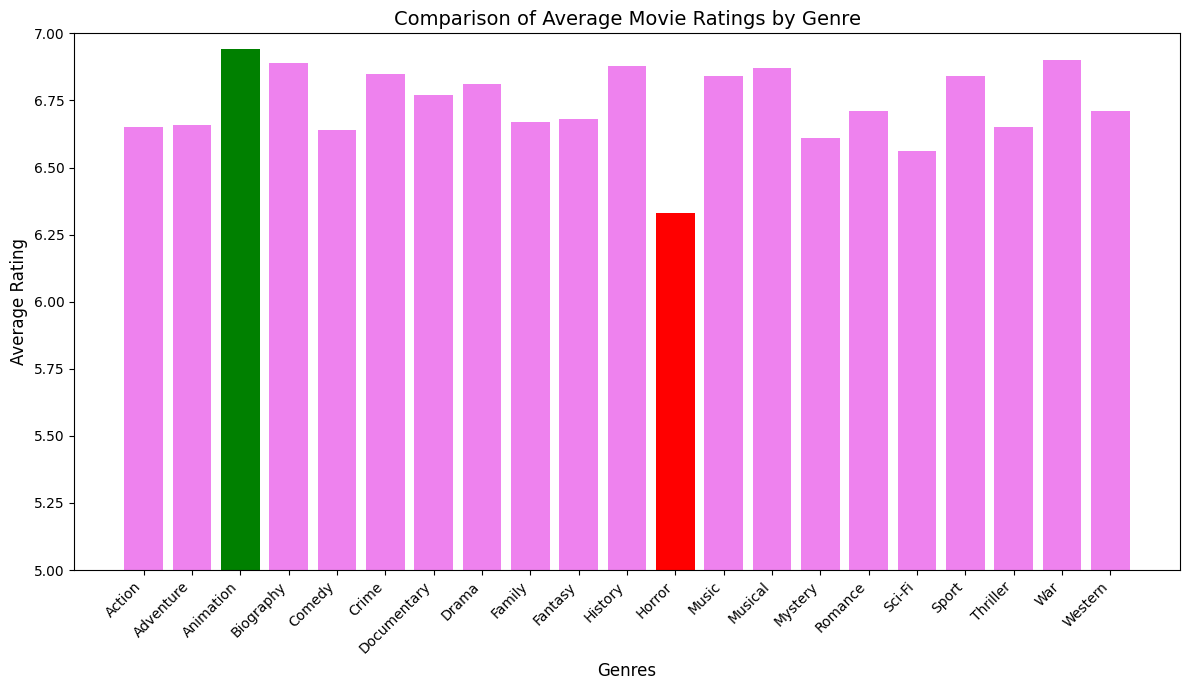

In [602]:
#This block creates a graph for most popular movie genres 

# Create a list of colors: green for the highest-rated, red for the lowest-rated, violet for others
colors = ['green' if genre == highest_rated_genre else
          'red' if genre == lowest_rated_genre else
          'violet' for genre in ratings_table['Genre']]

# Create a bar plot
plt.figure(figsize=(12, 7))  
plt.bar(ratings_table['Genre'], ratings_table['Average Rating'], color=colors)

# Add labels and title
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Comparison of Average Movie Ratings by Genre', fontsize=14)

# Set y-axis limits from 5 to 7
plt.ylim(5, 7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')  

# Show the plot
plt.tight_layout()  # Adjust the layout so everything fits nicely
plt.show()

Analysis:

This graph shows that the highest rated movie genre is animation and lowest rated is horror. Every genre hovers around a 6.5 average rating. What this shows is that animation movies are typically rated higher. This can be for a few reasons. One is that a lot of children go to watch animated movies and not a lot watch horror. Another reason could be that animated movies can have a variety of story lines that can overlap with other movies. There can be scary animated movies, comedies, musicals, and more. I think having them appeal to larger audience is a big reason for their high ratings.

In [603]:
# Filter out genres with fewer than 50 movies
genre_counts_filtered = genre_counts[genre_counts >= 50]

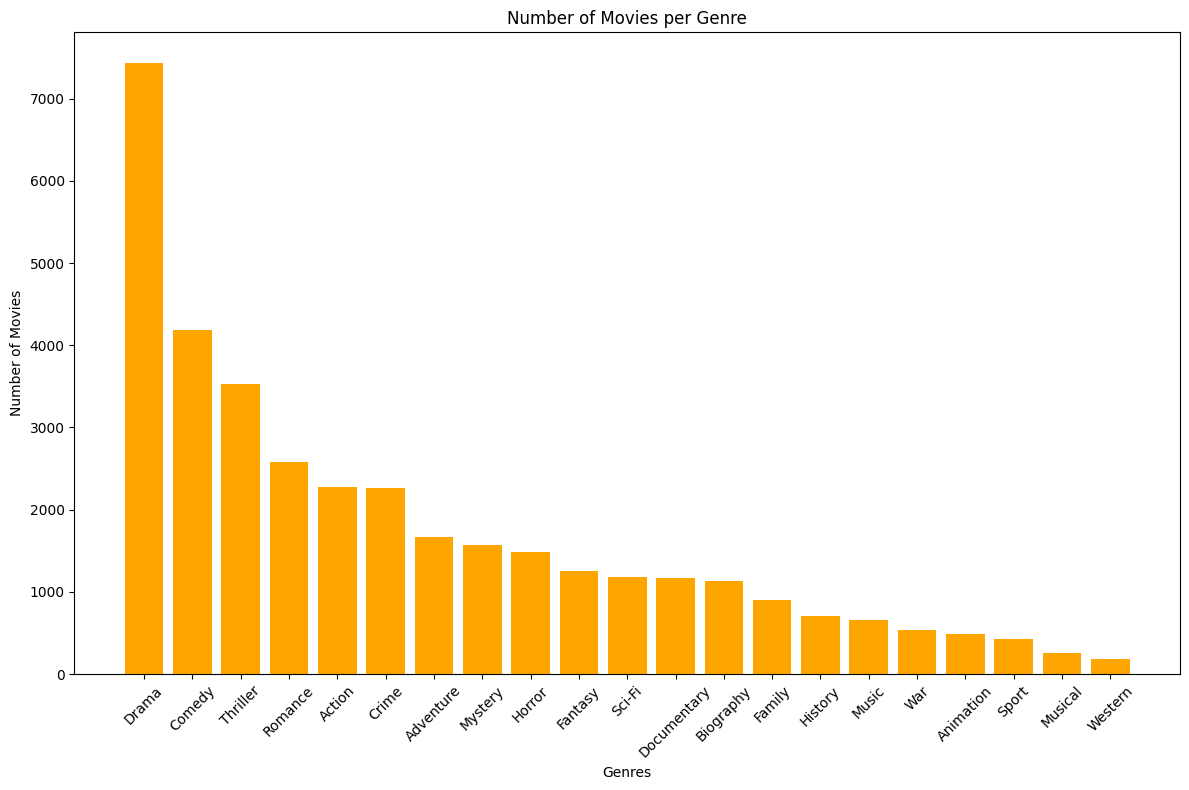

In [604]:

# Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(genre_counts_filtered.index, genre_counts_filtered.values, color='orange')

# Add labels and title
plt.title('Number of Movies per Genre')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)  

# Display the plot
plt.tight_layout()
plt.show()

Analysis:

This graph shows the amount of movies of each genre that are made. What can be seen is that drama movies are the most created and westerns are the least. I believe a lot of this has to do with the amount of resources that need to be invested. A drama movie can take place with a single actor and a single setting such as a regular house. Genres like animation, musicals, westerns, and sports require a higher budget. Sets must be built, cartoons must be animated, and songs must be written. 

In [605]:
#Method to turn time into minutes
def convert_to_minutes(duration):
    hours = df['Duration'].str.extract(r'(\d+) h').fillna(0).astype(float)
    minutes = df['Duration'].str.extract(r'(\d+) m').fillna(0).astype(float)
    total_minutes = (hours * 60) + minutes
    return total_minutes

In [606]:

# Add 'Total Duration (Minutes)' column to the dataframe
df['Total Duration (Minutes)'] = convert_to_minutes(df['Duration'])

# Split the genres and explode the dataframe
df_genres_separated_duration = df.assign(Genres=df['Genres'].str.split(',')).explode('Genres')

# Get the count of movies in each genre
genre_counts_duration = df_genres_separated_duration['Genres'].value_counts()

# Keep only genres with 50 or more movies
valid_genres_duration = genre_counts_duration[genre_counts_duration >= 50].index

# Filter the dataframe to include only rows with valid genres
df_genres_separated_duration = df_genres_separated_duration[df_genres_separated_duration['Genres'].isin(valid_genres_duration)]

# Group by 'Genres' and calculate the average movie length in minutes
average_duration_per_genre = df_genres_separated_duration.groupby('Genres')['Total Duration (Minutes)'].mean().round(2)

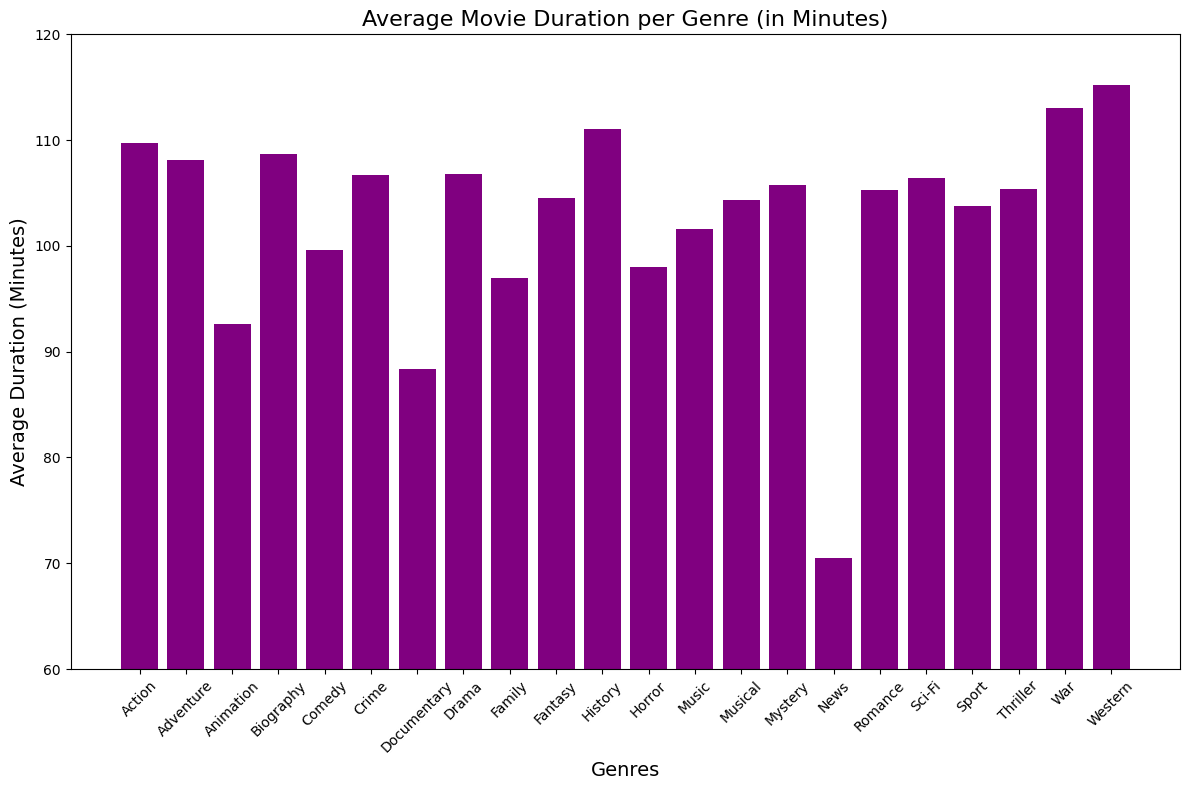

In [607]:
#Create a bar chart
plt.figure(figsize=(12, 8))
plt.bar(average_duration_per_genre.index, average_duration_per_genre.values, color='purple')

#Add labels and title
plt.title('Average Movie Duration per Genre (in Minutes)', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Average Duration (Minutes)', fontsize=14)
plt.xticks(rotation=45)  

#Set limits for Y-axis
plt.ylim(60,120)

#Display the plot
plt.tight_layout()  
plt.show()

Analysis:

What can be seen on this graph is that western movies typically have the longest runtime while news has the least. A majority of movies are also made to be between 90 to 110 minutes. This is likely due to the amount of time people are willing to spend to watch a movie. 

Conclusions:

Impact of Duration and Genre on Ratings:

Movies that require significant time and effort to produce, such as animated films, often receive the highest ratings. Animation, typically with a perfect runtime of about 90 minutes, allows for a satisfying viewing experience without excessive time investment.
In contrast, dramas, which can be produced on lower budgets and are often mass-produced, may not yield the same level of acclaim, suggesting a trade-off between budget and potential return on investment.

Appeal and Risk in Film Production:

Films with wide appeal tend to perform better in terms of ratings and viewership. Genres like Westerns, while they can be artistically significant, cater to a niche audience and often require substantial investment, leading to fewer productions.
This indicates that filmmakers may be hesitant to take risks, favoring either low-budget films with potential for breakout success or high-investment films aimed at broader audiences.

Areas for Future Research:

Analyzing how genre interest has evolved over the years and how external factors, such as cultural phenomena or major film releases, influence genre popularity could provide deeper insights. For example, the release of Star Wars led to a surge in sci-fi films, highlighting how market trends can shift in response to blockbuster successes.